## Initialization and preprocessing

In [1]:
import pandas as pd
from nltk import word_tokenize
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
%matplotlib inline 

In [2]:
df = pd.read_csv('AllReviewsCleanTokens.csv')
df.head()

,Unnamed: 0,date,review,rating,title,language,trip_date,hotel,source,tokens
0,0,1549152000000000000,enjoyed wonderful stay longleat centerparcs ti...,5,Sub-Tropical Swimming Paradise,en,1546300800000000000,Longleat Forest,TripAdvisor,"['enjoy', 'wonderful', 'stay', 'longleat', 'ce..."
1,1,1549238400000000000,long weekend break booked 8 friday 1st feb giv...,1,Appalling customer service,en,1548979200000000000,Longleat Forest,TripAdvisor,"['long', 'weekend', 'break', 'book', '8', 'fri..."
2,2,1549238400000000000,stayed fri fir area 45 minute walk car park go...,5,Snow,en,1546300800000000000,Longleat Forest,TripAdvisor,"['stay', 'fri', 'fir', 'area', '45', 'minute',..."
3,3,1549238400000000000,center parcs longleat numerous times always en...,1,Disaster in management,en,1548979200000000000,Longleat Forest,TripAdvisor,"['center', 'parcs', 'longleat', 'numerous', 't..."
4,4,1549238400000000000,like many people would seem break weekend happ...,1,Almost visit,en,1548979200000000000,Longleat Forest,TripAdvisor,"['like', 'many', 'people', 'would', 'seem', 'b..."


In [3]:
doc_en = df[df.language == 'en'].review
doc_fr = df[df.language == 'fr'].review

In [4]:
doc_en.head()

0    enjoyed wonderful stay longleat centerparcs ti...
1    long weekend break booked 8 friday 1st feb giv...
2    stayed fri fir area 45 minute walk car park go...
3    center parcs longleat numerous times always en...
4    like many people would seem break weekend happ...
Name: review, dtype: object

In [5]:
doc_fr.head()

9899    vient faire break week end soi disant appartem...
9900    mal famille apres attendez super piscine celle...
9901    2nd center parcs famille apres emhoff hollande...
9902    passe midweek tres agreable cet immense parc m...
9903    center parc prefere sejourne 4 center parc dif...
Name: review, dtype: object

goto

In [5]:
bag_of_words = list(map(word_tokenize,df.review))

Get all unique words of the corpus

In [7]:
wordSet = set().union(*bag_of_words)
#wordSet

Now, we create a list with one dictionary for each review, containing all words of the corpus

In [8]:
wordDict = []

for i in range(len(bag_of_words)):
    wordDict.append(dict.fromkeys(wordSet, 0))

If a review countains a word, we add 1 to its count

In [9]:
for i, sent in enumerate(bag_of_words): 
    for word in sent:
        wordDict[i][word]+=1

We have our Document Term Matrix

In [10]:
doc_term = pd.DataFrame(wordDict)

We build a bar plot

In [17]:
df_mean = df.mean().sort_values(ascending=False).to_frame(name='occurence mean')

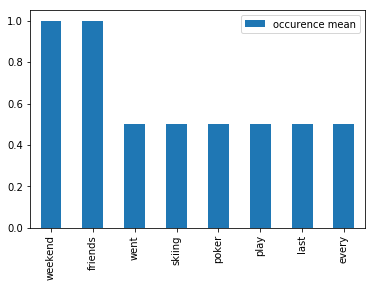

In [18]:
df_mean[:8].plot.bar()

## Term Frequency (TF)

In [6]:
vect_en = TfidfVectorizer(tokenizer=word_tokenize)
vect_fr = TfidfVectorizer(tokenizer=word_tokenize)
vect_transformed_en = vect_en.fit_transform(doc_en)
vect_transformed_fr = vect_fr.fit_transform(doc_fr)

In [7]:
feature_names_en = np.array(vect_en.get_feature_names())
feature_names_fr = np.array(vect_fr.get_feature_names())
sorted_tfidf_index_en = vect_transformed_en.max(0).toarray()[0].argsort()
sorted_tfidf_index_fr = vect_transformed_fr.max(0).toarray()[0].argsort()

In [9]:
print('Smallest tfidf en:\n{}\n'.format(feature_names_en[sorted_tfidf_index_en[:10]]))
print('Largest tfidf en: \n{}'.format(feature_names_en[sorted_tfidf_index_en[:-11:-1]]))
print()
print()
print('Smallest tfidf fr:\n{}\n'.format(feature_names_fr[sorted_tfidf_index_fr[:10]]))
print('Largest tfidf fr: \n{}'.format(feature_names_fr[sorted_tfidf_index_fr[:-11:-1]]))


Smallest tfidf en:
['ajar' 'spells' 'cookware' 'cubby' 'nosier' 'coathangers' 'alcove'
 'shaver' 'qfield' 'cafethe']

Largest tfidf en: 
['ballam' 'raquets' '•' 'amp' 'elverdon' 'barry' 'quot' 'snowed' 'leah'
 'siter']


Smallest tfidf fr:
['hifi' 'ajuster' 'comfortableness' 'quoiqu' 'coincidant' 'arretaient'
 'classes' 'rampe' 'resserres' 'resserre']

Largest tfidf fr: 
['pensions' 'fabuleux' 'rendu' 'a1' 'zumba' 'chiens' 'barry' 'adore'
 'prudent' 'chien']


In [10]:
df_sklearn_total_en = pd.DataFrame(vect_transformed_en.todense(), columns = feature_names_en)
df_sklearn_total_en.head()

,0,00,000,004,006,00am,00ambig,00ish,00pm,01,...,🙈🙈😁,🚴,🤔,🤔the,🤔worth,🤢,🤣,🥓,🥞,🥧
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [11]:
df_sklearn_total_fr = pd.DataFrame(vect_transformed_fr.todense(), columns = feature_names_fr)
df_sklearn_total_fr.head()

,0,00,000,03,1,10,100,1000,100£,1030,...,☺nous,🏉,😀,😃,😄,😄there,😉,😊,😊will,😊😊😊😊
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


They have similar values. Not exactly the same because the formulas used to comput the TF-IDF scores are different.

In [12]:
df_sklearn_en = df_sklearn_total_en[['great',
'good',
'staff',
'food',
'activities',
'year',
'family',
'holiday',
'well',
'pool',
'expensive',
'break',
'excellent',
'much',
'accommodation',
'really',
'visit',
'clean',
'go',
'service',
'always',
'restaurants',
'swimming',
'back',
'stayed',
'stay',
'children',
'money',
'friendly',
'place']]

In [13]:
df_sklearn_fr = df_sklearn_total_fr[['piscine',
'faire',
'activites',
'enfants',
'passe',
'sejour',
'beaucoup',
'etre',
'bon',
'vraiment',
'propre',
'peu',
'cher',
'famille',
'villa',
'hotel',
'agreable',
'personnel',
'ils',
'aussi',
'super',
'vacances',
'fois',
'week',
'end',
'comme',
'choses',
'car',
'parc',
'temps']]

## Build a bar chart

In [14]:
df_sklearn_mean_en = df_sklearn_en.mean().sort_values(ascending=False).to_frame(name='tfidf mean')
df_sklearn_mean_en.head()

,tfidf mean
great,0.034890
good,0.028758
pool,0.026287
activities,0.024022
staff,0.023120


In [15]:
df_sklearn_mean_fr = df_sklearn_fr.mean().sort_values(ascending=False).to_frame(name='tfidf mean')
df_sklearn_mean_fr.head()

,tfidf mean
enfants,0.031304
sejour,0.030939
faire,0.029885
beaucoup,0.028521
piscine,0.028337


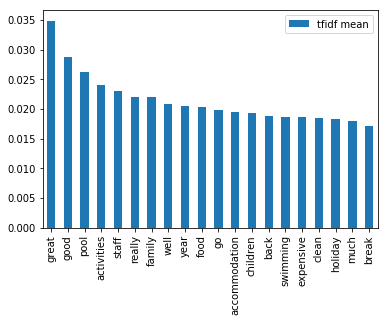

In [16]:
df_sklearn_mean_en[:20].plot.bar()

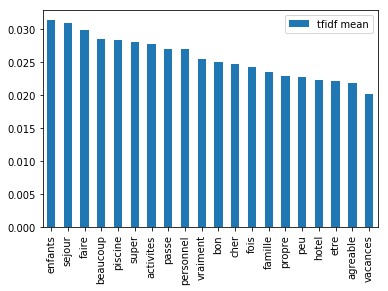

In [17]:
df_sklearn_mean_fr[:20].plot.bar()

## Build a word cloud

In [18]:
from wordcloud import WordCloud
from PIL import Image
import matplotlib.pyplot as plt

In [19]:
dict_words_tfidf_en = df_sklearn_mean_en[df_sklearn_mean_en['tfidf mean'] != 0].to_dict()['tfidf mean']
dict_words_tfidf_fr = df_sklearn_mean_fr[df_sklearn_mean_fr['tfidf mean'] != 0].to_dict()['tfidf mean']

In [21]:
#read mask (just for fun)
hotel_mask = np.array(Image.open("hotel.jpg"))

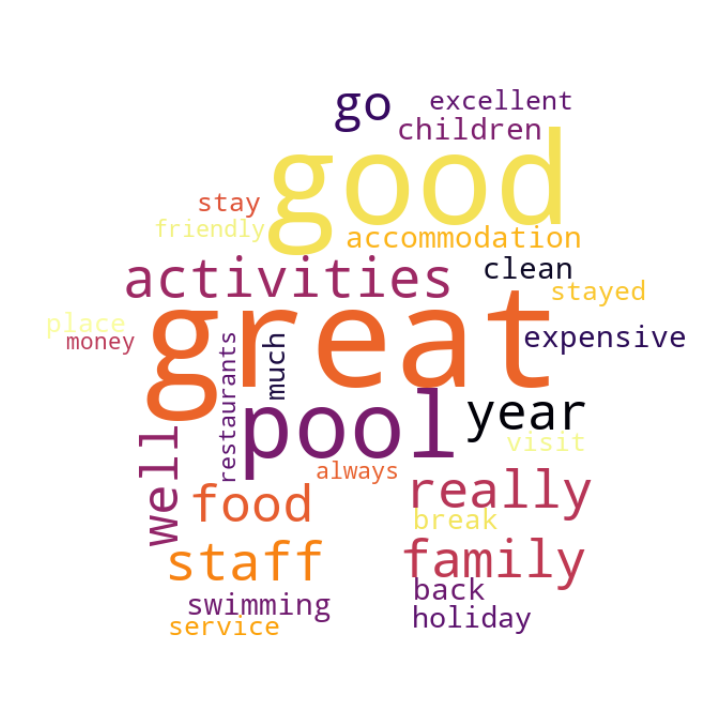

In [22]:
wordcloud = WordCloud(height=600, width=800, background_color="white", colormap='inferno', max_words=100, mask=hotel_mask)
wordcloud.generate_from_frequencies(frequencies=dict_words_tfidf_en)
plt.figure(figsize=(12,16))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

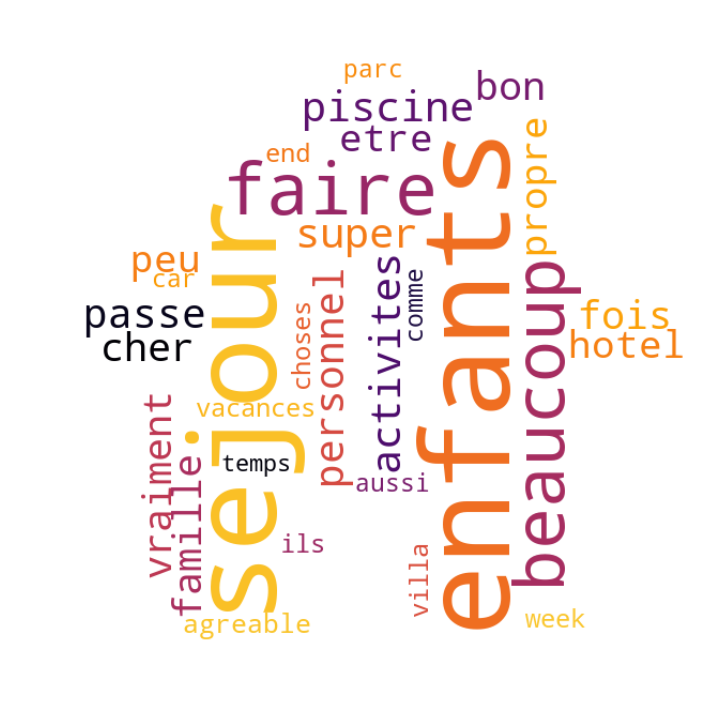

In [23]:
wordcloud = WordCloud(height=600, width=800, background_color="white", colormap='inferno', max_words=100, mask=hotel_mask)
wordcloud.generate_from_frequencies(frequencies=dict_words_tfidf_fr)
plt.figure(figsize=(12,16))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()